In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import skimage.filters

from google.colab import drive, files
drive.mount('/content/drive') # mount your google colab file

Mounted at /content/drive


In [ ]:
SIZE = 256   #Resize images

#Capture training data and labels into respective lists
images = []
labels = []


for directory_path in glob.glob("/content/drive/MyDrive/ML_IPData7/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)
        labels.append(label)

Rifle
Golf cart


In [ ]:
images = np.array(images)
type(labels)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder = LabelEncoder()

labelencoder.fit(labels)
enc_labels = labelencoder.transform(labels)

In [ ]:
normalized_images = []
for img in images:
  img = img.astype(np.float32)
  mean, std = img.mean(), img.std()
  normalized_img = (img - mean) / std
  normalized_images.append(normalized_img)

normalized_images = np.array(normalized_images)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

from skimage.feature import hog

fd_list = []
hog_list = []
flattened_images = []
flattened_fd = []

for img in normalized_images:
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(img.shape[0] // 8, img.shape[1] // 8), cells_per_block=(2, 2), visualize=True)
  hog_list.append(hog_image)
  fd_list.append(fd)
  flattened_fd.append(fd.flatten())
  flattened_images.append(hog_image.flatten())


X_train, X_test, y_train, y_test = train_test_split (fd_list, enc_labels, test_size = 0.2, random_state = 42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=12, random_state=0)
RF = RF.fit((X_train), y_train)
y_pred = RF.predict((X_test))

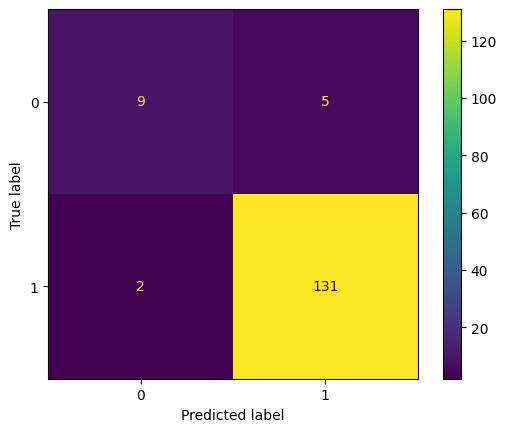

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.96      0.98      0.97       133

    accuracy                           0.95       147
   macro avg       0.89      0.81      0.85       147
weighted avg       0.95      0.95      0.95       147

1.0
0.9523809523809523


In [ ]:
report = classification_report(y_test, y_pred)
cf = confusion_matrix(y_test, y_pred)
cf_display = ConfusionMatrixDisplay(cf)
cf_display.plot()
plt.show()
print(report)
print(RF.score((X_train), y_train))
print(RF.score((X_test), y_test))